# 의사결정나무 회귀, 랜덤 포레스트 회귀

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('https://github.com/ageron/handson-ml/raw/master/datasets/housing/housing.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
df.dropna(inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [29]:
df.drop(["ocean_proximity"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [30]:
y = df['median_house_value']
X = df.drop(['median_house_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14303, 8) (6130, 8) (14303,) (6130,)


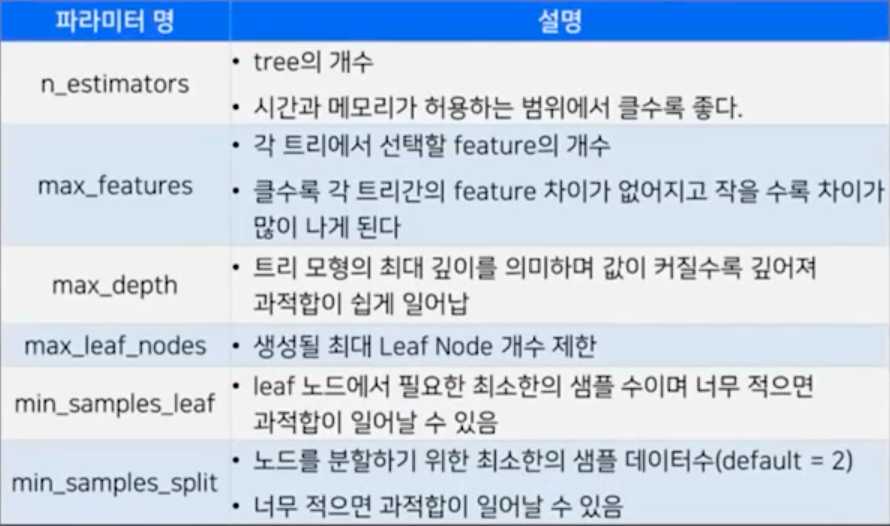
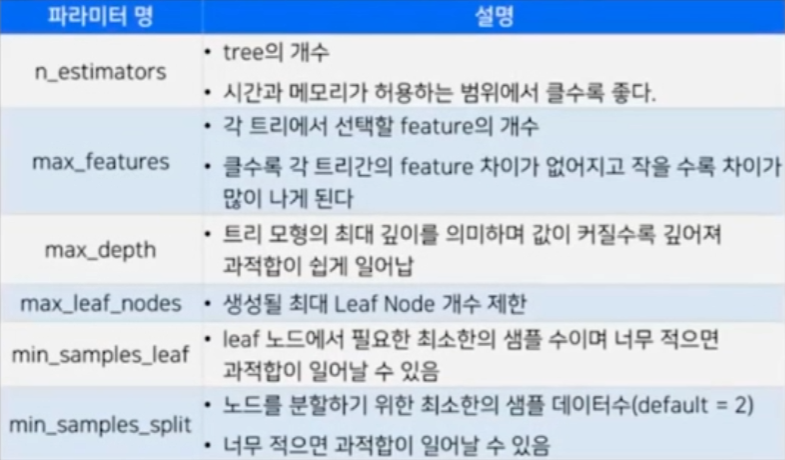

In [31]:
model = DecisionTreeRegressor(max_depth=7, random_state=42)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [33]:
pred = model.predict(X_test)
pred

array([283827.97689076, 495681.13043478,  75916.66666667, ...,
       114157.84313725,  88439.34142114, 230298.68552253], shape=(6130,))

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
pred = model.predict(X_test)

r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

print("r2 score : ", r2)
print("평균 제곱 오차 MSE : ", mse)
print("평균 절대 오차 MAE : ", mae)
print("루트 평균 제곱 오차 RMSE : ",rmse)

r2 score :  0.6548207058511972
평균 제곱 오차 MSE :  4684444827.557763
평균 절대 오차 MAE :  47878.268428134295
루트 평균 제곱 오차 RMSE :  68443.00422656623


In [36]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=7, random_state=42)
model2.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
pred2 = model2.predict(X_test)

r2 = r2_score(y_test, pred2)
mse = mean_squared_error(y_test, pred2)
mae = mean_absolute_error(y_test, pred2)
rmse = np.sqrt(mse)

print("r2 score : ", r2)
print("평균 제곱 오차 MSE : ", mse)
print("평균 절대 오차 MAE : ", mae)
print("루트 평균 제곱 오차 RMSE : ",rmse)

r2 score :  0.7070042309612139
평균 제곱 오차 MSE :  3976259694.70339
평균 절대 오차 MAE :  43750.1541434771
루트 평균 제곱 오차 RMSE :  63057.590302067445
